<a href="https://colab.research.google.com/github/Ivan412/training/blob/main/6_python_advaced/3_visualization/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Продвинутый Python. Часть 3: Визуализация зависимостей. Гео-данные и картограммы.

---


#**Задание: объекты культурного наследия России**

Изучите набор данных по объектам культурного наследия России (в виде gz-архива):

https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz

и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные

https://video.ittensive.com/python-advanced/russia.json

Выведите для каждого региона количество объектов в нем.

Посчитайте число объектов культурного наследия в Татарстане.

In [ ]:
#установим geopandas
!pip install --upgrade geopandas

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [ ]:
#прочиваем геоданные и привидем к подходящей проекции
gdata = gpd.read_file('https://video.ittensive.com/python-advanced/russia.json')
gdata = gdata.to_crs({'init': 'epsg:5940'})
#загрузим данные необходимые для выполнения задания по объектам культурного наследия
fields = ['Объект', 'Номер в реестре', 'Регион']
cdata = pd.read_csv('https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz', compression='gzip', delimiter=',', usecols=fields)

In [16]:
#посчитаем количество идентификаторов объектов по регионам
cdata = cdata.groupby(['Регион'])['Номер в реестре'].count().reset_index().rename(columns={'Номер в реестре': 'Всего объектов'})
# создадим столбцы Area с названиями регионов для слияния датафреймов
gdata['Area'] = gdata['NL_NAME_1'].apply(lambda x: str(x).lower())
cdata['Area'] = cdata['Регион'].apply(lambda x: str(x).lower())

In [17]:
#проверим не совподающие названия регионов
gAreaUniq = gdata['Area'].unique()
cAreaUniq = cdata['Area'].unique()
print('Geodata odd area names:', np.setdiff1d(gAreaUniq, cAreaUniq))
print('Cultdata odd area names:', np.setdiff1d(cAreaUniq, gAreaUniq))

Geodata odd area names: ['республика адыгея' 'республика марий-эл' 'республика северная осетия'
 'республика татарстан' 'ханты-мансийский автономный округ'
 'чувашская республика']
Cultdata odd area names: ['республика адыгея (адыгея)' 'республика марий эл'
 'республика северная осетия - алания' 'республика татарстан (татарстан)'
 'ханты-мансийский автономный округ - югра'
 'чувашская республика - чувашия']


In [18]:
#словарь для исправлений
areas = {'республика адыгея': 'республика адыгея (адыгея)', 'республика марий-эл': 'республика марий эл', 
         'республика северная осетия': 'республика северная осетия - алания', 'республика татарстан': 'республика татарстан (татарстан)', 
         'ханты-мансийский автономный округ': 'ханты-мансийский автономный округ - югра', 'чувашская республика': 'чувашская республика - чувашия'}
#исправим названия регионов в датафрейме gdata
for index, row in gdata.iterrows():
  if row['Area'] in areas.keys():
    #print(row['Area'], '->', areas[row['Area']])
    gdata.at[index, 'Area'] = areas[row['Area']]

In [19]:
#проверим не совподающие названия регионов еще раз
gAreaUniq = gdata['Area'].unique()
cAreaUniq = cdata['Area'].unique()
print('Geodata odd area names:', np.setdiff1d(gAreaUniq, cAreaUniq))
print('Cultdata odd area names:', np.setdiff1d(cAreaUniq, gAreaUniq))

Geodata odd area names: []
Cultdata odd area names: []


In [20]:
#сольем датафреймы
data = pd.merge(left=gdata, right=cdata, left_on="Area", right_on="Area")

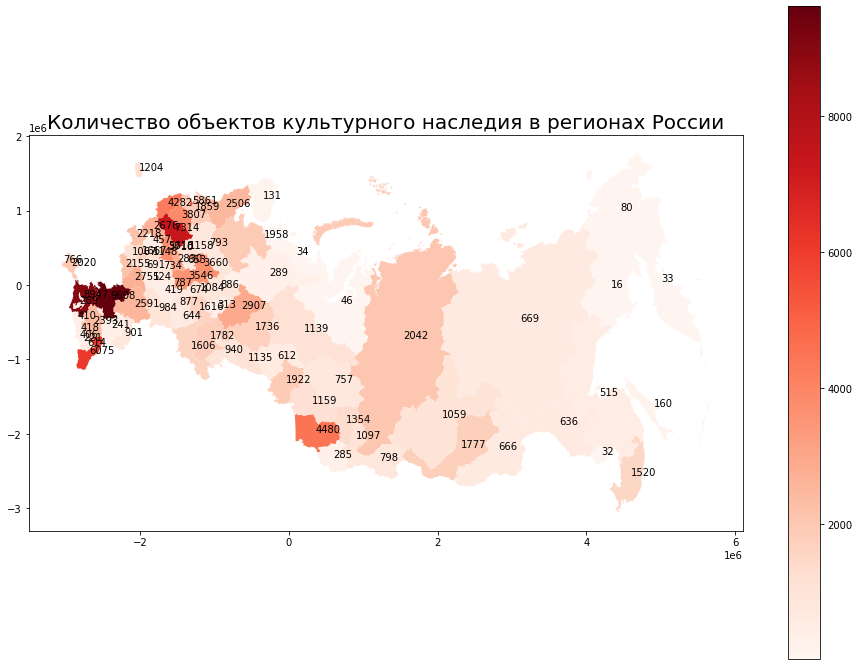

In [21]:
#построим фоновую картограмму
fig = plt.figure(figsize=(16,12))
area = plt.subplot(1, 1, 1)

data.plot(ax=area, legend=True, column='Всего объектов', cmap='Reds')
plt.title("Количество объектов культурного наследия в регионах России", fontsize=20)
for idx, ar in data.iterrows():
  area.annotate(ar['Всего объектов'], xy=(ar.geometry.centroid.x, ar.geometry.centroid.y))
  
plt.show()

In [22]:
tat = data.loc[data['Area'] == 'республика татарстан (татарстан)']['Всего объектов'].values[0]
print('Всего объектов в Татрастане: ' + str(tat))

Всего объектов в Татрастане: 1616
